In [1]:
from qiskit import __version__
__version__

'1.3.1'

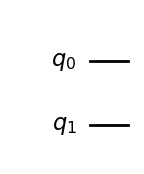

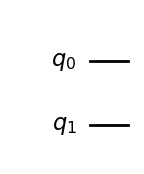

In [1]:
from qiskit import *

import matplotlib.pyplot as plt
%matplotlib inline
 
qc = QuantumCircuit(2)

qc.draw('mpl')

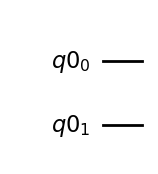

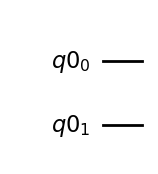

In [3]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.draw('mpl')

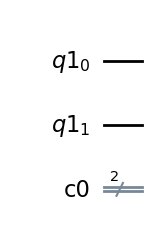

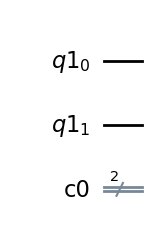

In [4]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.draw('mpl')

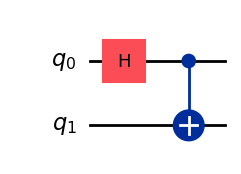

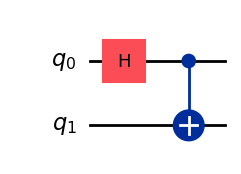

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

qc.draw('mpl')

In [3]:
from qiskit.quantum_info import Statevector

Statevector(qc)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [4]:
from qiskit.visualization.array import array_to_latex

array_to_latex(Statevector(qc))

<IPython.core.display.Latex object>

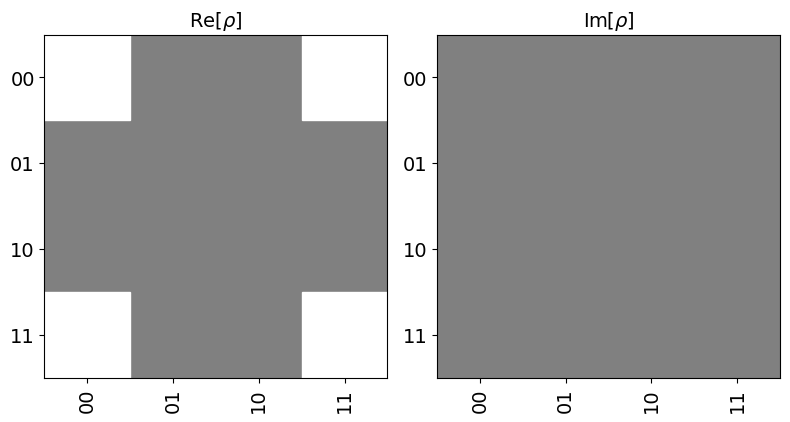

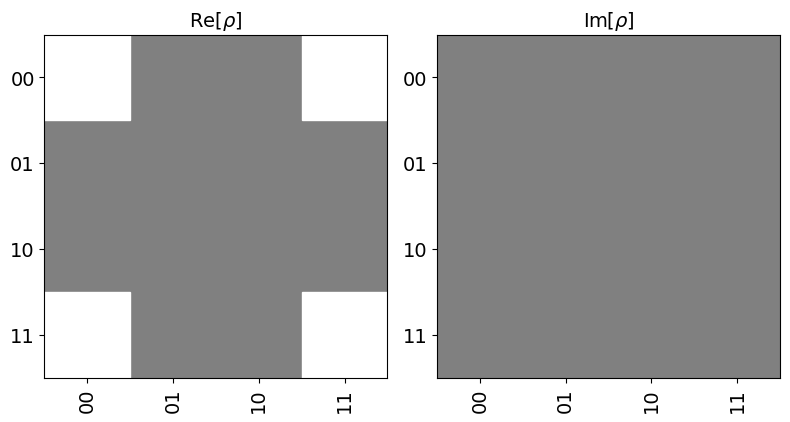

In [5]:
Statevector(qc).draw('hinton')

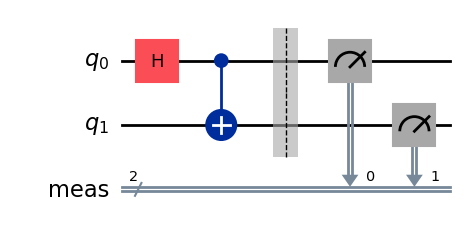

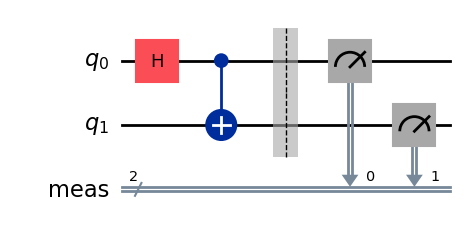

In [6]:
qc.measure_all()
qc.draw('mpl')

In [13]:
from qiskit.providers.fake_provider import GenericBackendV2

backend = GenericBackendV2(num_qubits=5)

job = backend.run(qc)

counts = job.result().get_counts()

counts

{'11': 485, '00': 520, '01': 12, '10': 7}

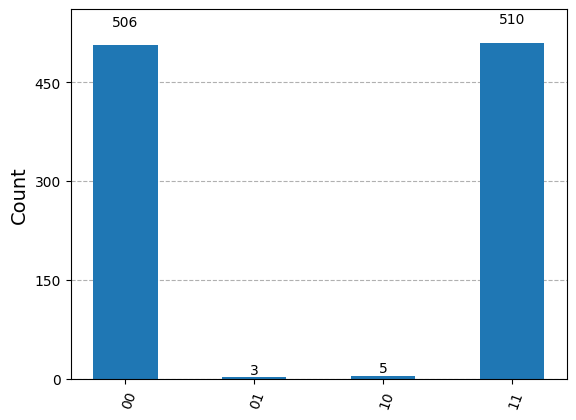

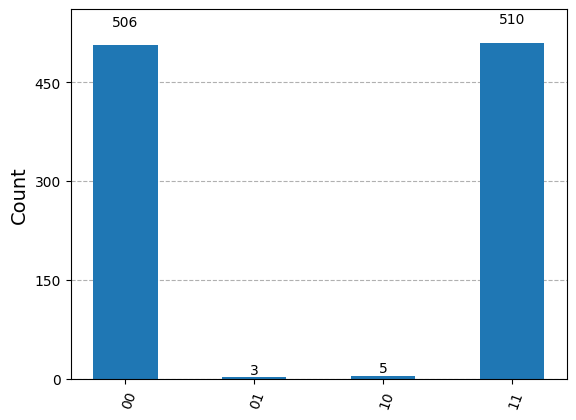

In [8]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

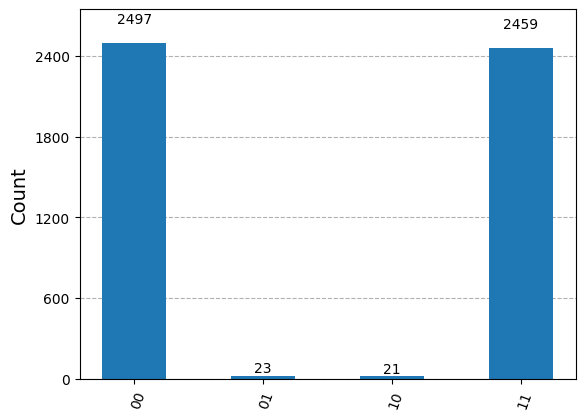

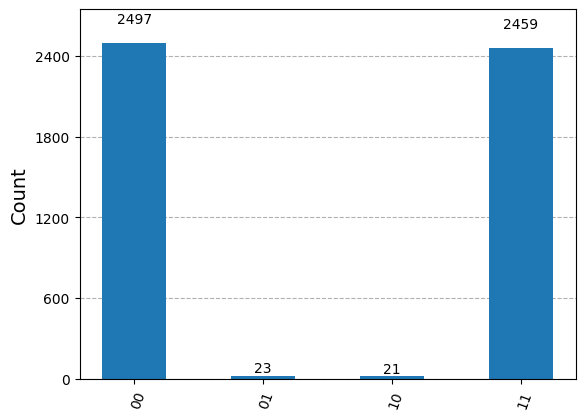

In [9]:
job = backend.run(qc, shots=5000)

counts = job.result().get_counts()

plot_histogram(counts)

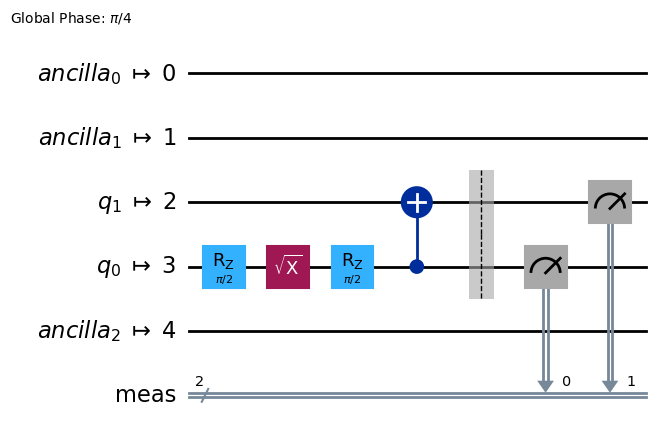

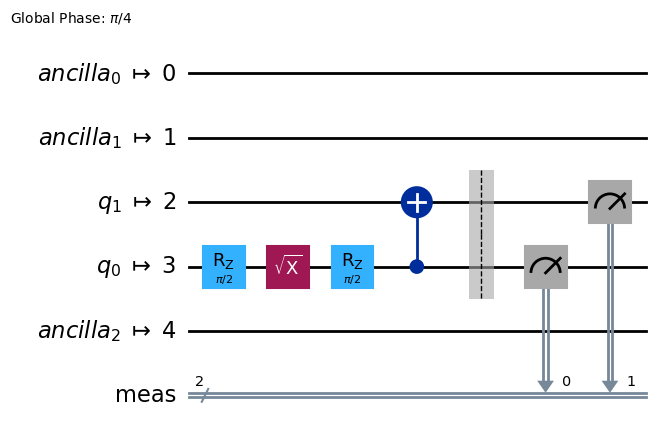

In [10]:
transpiled_qc = transpile(qc, backend)
transpiled_qc.draw('mpl')


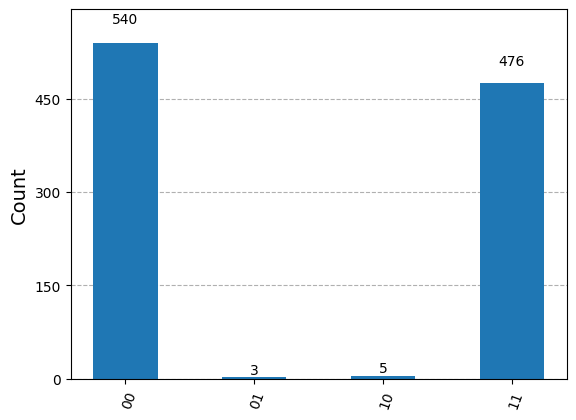

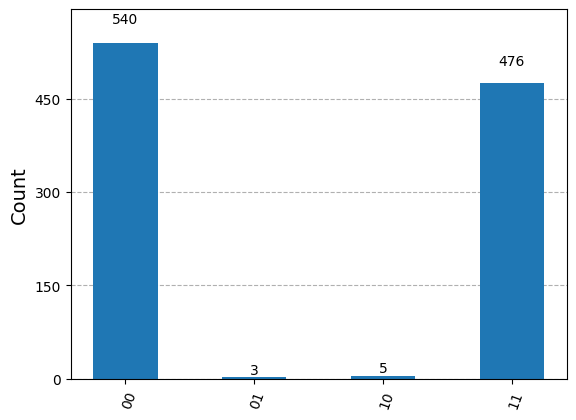

In [11]:
job = backend.run(transpiled_qc)

counts = job.result().get_counts()

plot_histogram(counts)

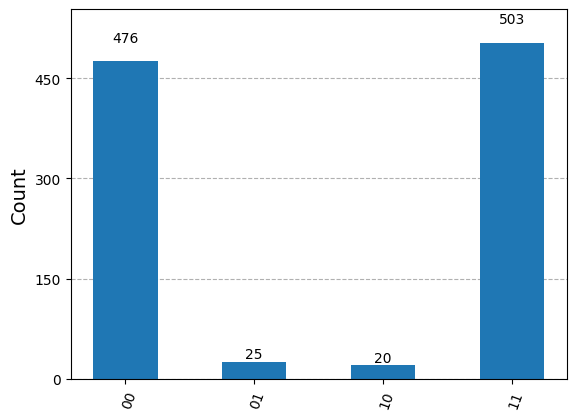

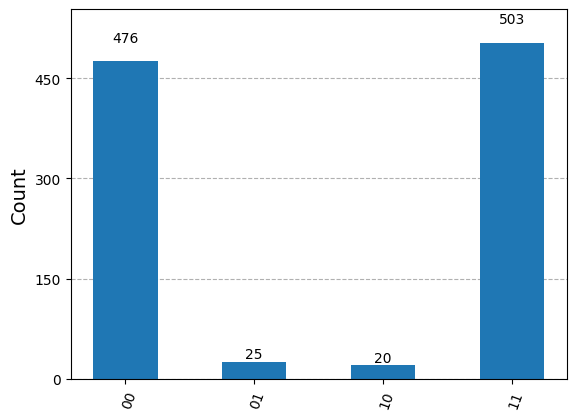

In [14]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeJakartaV2

backend = FakeJakartaV2()

simulator = AerSimulator.from_backend(backend)

transpiled_qc = transpile(qc, backend)

job = simulator.run(transpiled_qc)

counts = job.result().get_counts()

plot_histogram(counts)


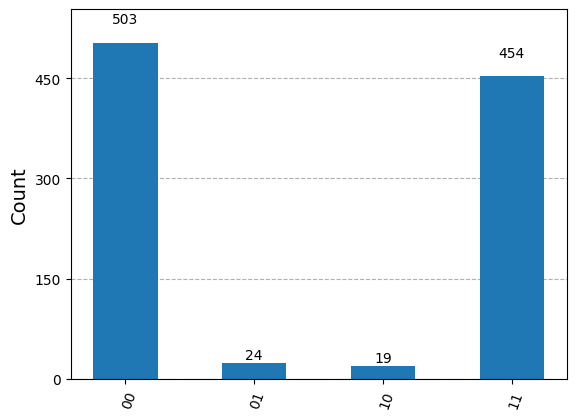

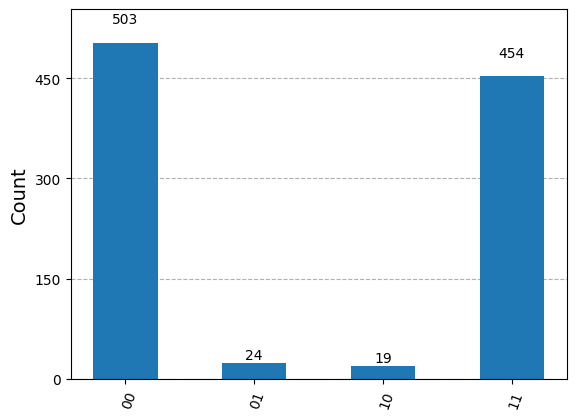

In [15]:
from qiskit_ibm_runtime.fake_provider import FakeJakartaV2 
from qiskit_ibm_runtime import SamplerV2 as Sampler


backend = FakeJakartaV2()

transpiled_qc = transpile(qc, backend)

sampler = Sampler(backend)
job = sampler.run([(transpiled_qc, [])], shots=1000)
result = job.result()

counts = result[0].data.meas.get_counts()
plot_histogram(counts)

In [17]:
from qiskit_ibm_runtime import QiskitRuntimeService
token = "***********************************************"
service = QiskitRuntimeService(channel="ibm_quantum", token=token)

In [105]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_brussels')>,
 <IBMBackend('ibm_fez')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_marrakesh')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_strasbourg')>,
 <IBMBackend('ibm_torino')>,
 <IBMBackend('ibm_yonsei')>]

In [18]:
backend_real = service.backend("ibm_brisbane")

In [ ]:
transpiled_qc_real = transpile(qc, backend_real)

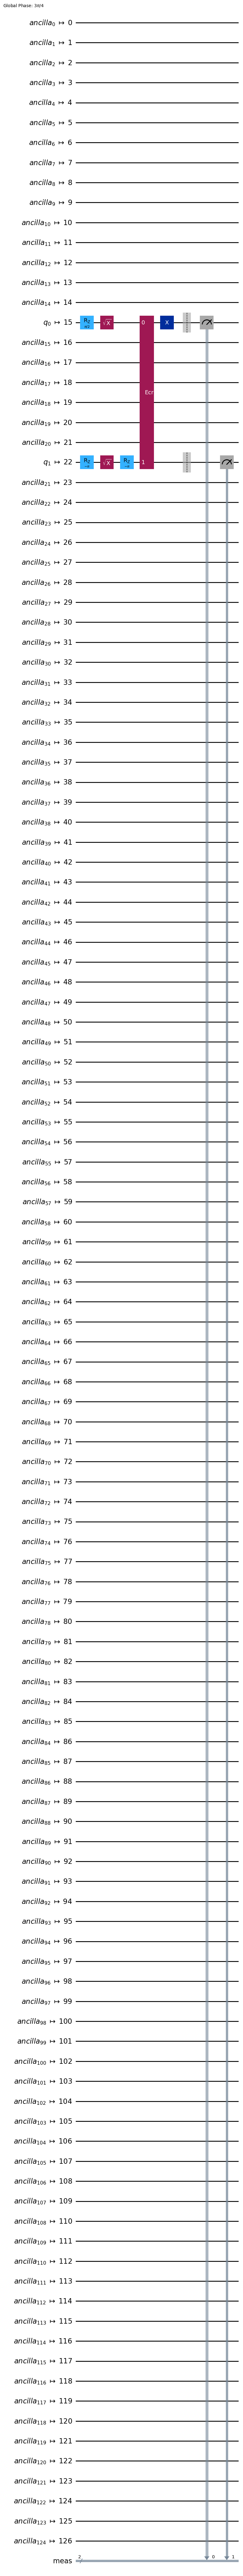

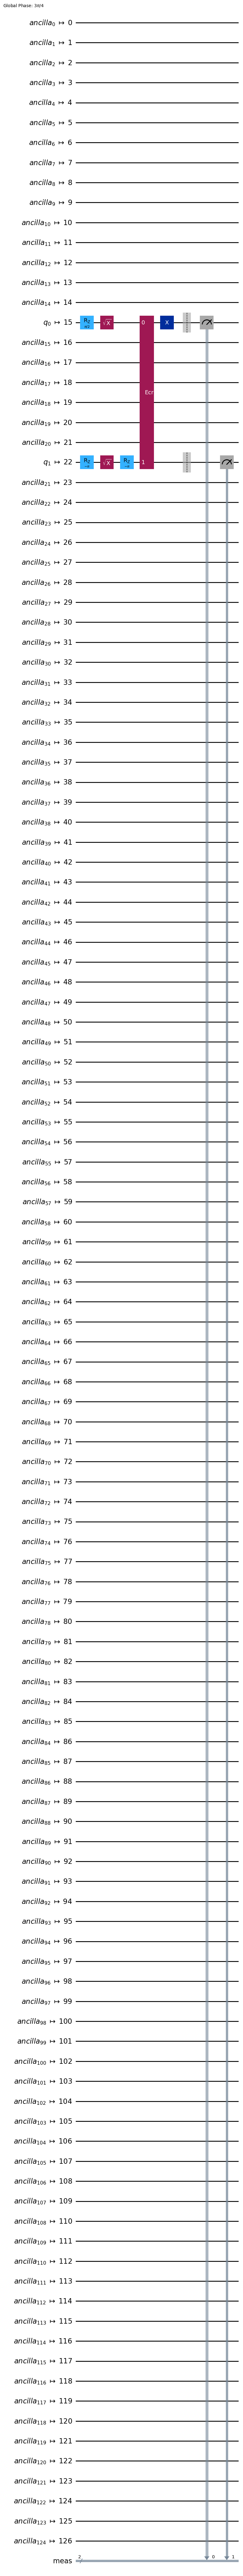

In [29]:
transpiled_qc_real.draw('mpl', fold=True)

In [33]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=backend_real)

job = sampler.run([(transpiled_qc_real, [])])

In [37]:
job.job_id()

'cy6e1w79b62g008hny60'

In [38]:
job.result()

KeyboardInterrupt: 

In [41]:
backend_least_busy = service.least_busy()

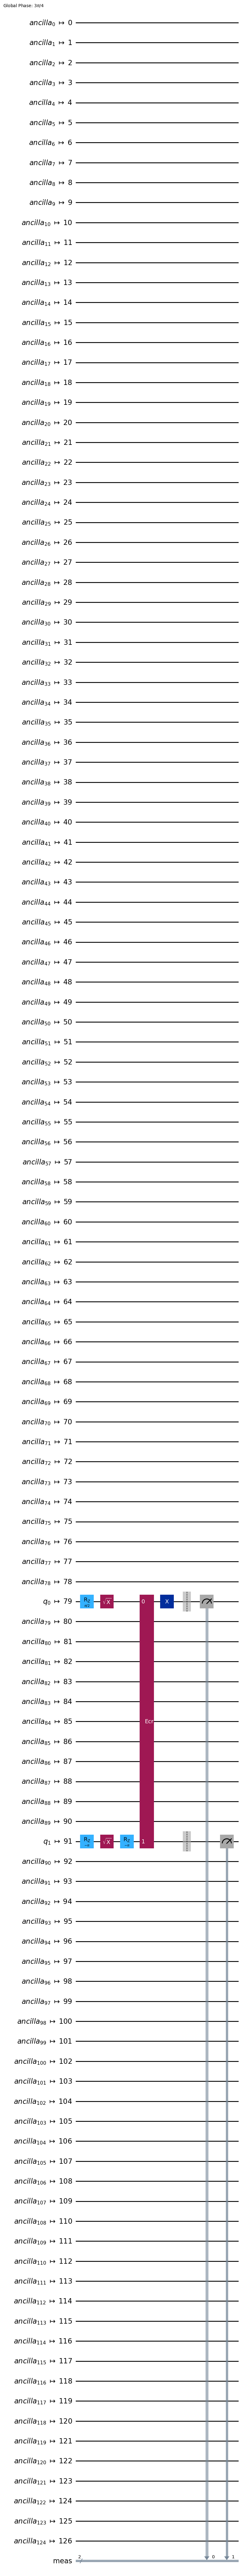

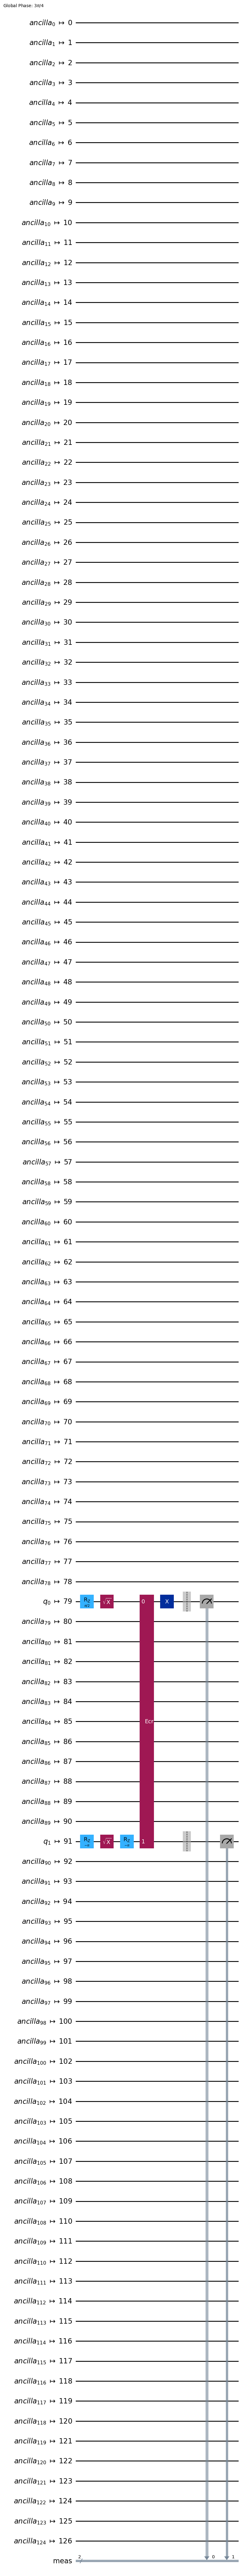

In [42]:
transpiled_qc_real = transpile(qc, backend_least_busy)

transpiled_qc_real.draw('mpl')

In [43]:
sampler = Sampler(mode=backend_least_busy)

job = sampler.run([(transpiled_qc_real, [])])

job.job_id()

'cy6ecga9b62g008hnzy0'

In [58]:
result = job.result()

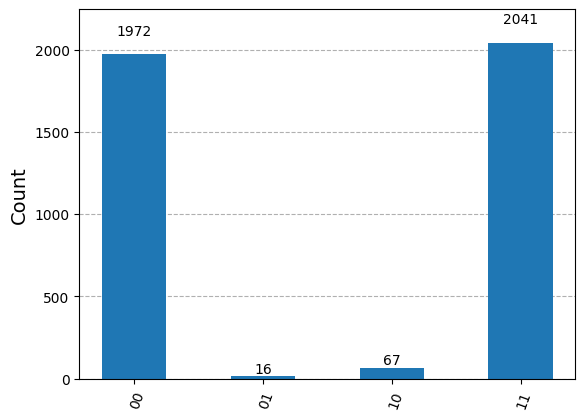

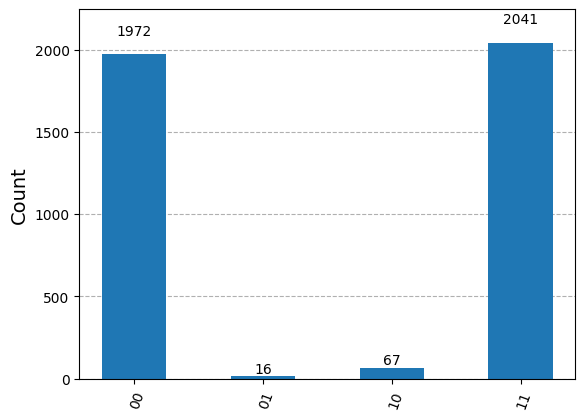

In [60]:
counts = result[0].data.meas.get_counts()

plot_histogram(counts)